### Linear Regression Models

- use regression when target variable is numeric data; has multiple linear regression models
    - *multiple regression*: linear relationships btwn 2+ independent variables and one *dependent* variable; polynomial function: y = b + b1x1
    - *polynomial regression*: modeling relationship btwn one *independent* variable and one *dependent* variable using an nth degree polynomial function; polynomial function: *y = b + b1x1 + b2x2 + ... + b(n)x(n)* <- subscripts
    - *polynomial multiple regression*: modeling relationship btwn two+ *independent* variables and one *dependent* variable using nth degree polynomial function; polynomial function: *y = b + b1x1 + b2x1^2 + ... + b(n)x1^n*
- use classification when looking at different types of data
    - can change classification data to numerical (ie, represent different outcomes w/ numeric value) to use regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
dataset = load_boston()

C:\Users\mcken\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
# get basic info about dataset -> shows attributes of dataset, ie dtypes of variables, num of rows, etc.
# transform classification data into numerical where needed for regression
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print(dataset.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [5]:
# print target variable for dataset -> allows to visualize data better
print(dataset.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
# input the dataset's DATA to make df
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

# add target variable to df as well
df['PRICE'] = dataset.target

df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [7]:
# check number of columns w/ 0 value -> some datasets have 0 to represent null instead of 'null' or NaN
(df['ZN'] == 0).sum()

372

In [8]:
# check columns w/ 0 value -> important to check if variable should be kept or dropped
(df['CHAS'] ==0).sum()

471

In [9]:
# 'no variable attribute' -> vol. with all the same or similar values
# get correlation coef. of each variable to other vars.
print(df.corr()) # gives matrix of corr. coef. -> range of -1 to 1 (perfect neg. correl. to perfect pos. correl. -> values are same or not)

# zero or close to zero correl. coef. means loose correlation!
# correl. coef. is the coef. for the polynomial function for linear regression model (the subscript n)
# perfect linear regression graph (dots are close to the line) means correl. coef. is closer to 1
# scattered dots on linear regression graph means further from 1, closer to 0 

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [10]:
# shows the correlation for each attribute from least to greatest
# strongest correl. to price is LSTAT bc it is closer to -1 (strong) than RM is to +1 -> further from 0
co = df.corr()
co.iloc[:,-1].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

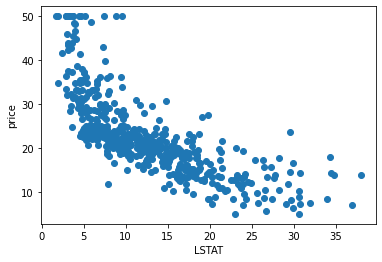

In [12]:
# create linear regression out of the closest correl. variables to the target (price)
# look at the correlation btwn the closely related variable to price
plt.scatter(df['LSTAT'], df['PRICE'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('price')

plt.show()

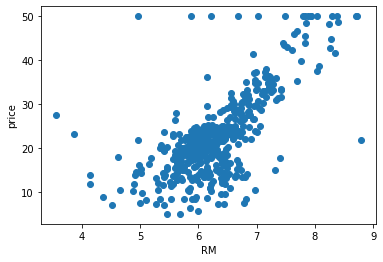

In [13]:
# compare the last one w/ this one, where this variable is less correlated
plt.scatter(df['RM'], df['PRICE'], marker='o')
plt.xlabel('RM')
plt.ylabel('price')

plt.show()

In [15]:
# here we will set up the data that we will use to test and train the model
# use training data to build model, and test data to validate the model

# declare variables -> x is what we are predicting, y is the target variable
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['PRICE']

# import testing
from sklearn.model_selection import train_test_split

# Now we will split the dataset into 80% for training and 20% for testing
# test the data; random state allows model to draw same data from dataset -> makes model repeatable
# note that there is a x_train, Y_train and an x_TEST, Y_TEST
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state=5)

# We will build the prediction model based on the training data and use the testing data to test it.
# Check the shape of the training data and testing data.
print(x_train.shape)
print(Y_train.shape)

(404, 2)
(404,)


In [16]:
# the training data
x_train.head(5)

,LSTAT,RM
33,18.35,5.701
283,3.16,7.923
418,20.62,5.957
502,9.08,6.120
402,20.31,6.404


In [22]:
# build the linear regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# train the model
model.fit(x_train, Y_train)

# use testing data to test prediction of the models
price_pred = model.predict(x_test) #predict the price; must input a 2D array

# check the R-squared number to validate the test score (see how well the model can predict)
print("R-squared testing data:")
print('R-squared: %.4f' % model.score(x_test, Y_test)) #value is usually smaller than the train R-squared

print("R-squared training data: ")
print('R-squared: %.4f' % model.score(x_train, Y_train)) #train data is usually closer to 1; higher than the testing data

R-squared testing data:
R-squared: 0.6629
R-squared training data: 
R-squared: 0.6301


In [21]:
# check the intercept/slope and coef. to make linear regression equation
print("Slope:")
print(model.intercept_)
print("Coef.:")
print(model.coef_) #these are coefs. for the different attributes' correl.

Slope:
2.7362403426066138
Coef.:
[-0.71722954  4.58938833]


In [24]:
# linear regression equation using the coefs. that we just found
# equation = y = -0.7x1 + 4.5x2 + 2.7 -> y = mx + b

# use the data to make a prediction
print("Prediction of Price: ")
print(model.predict([[30,5]]))

Prediction of Price: 
[4.1662957]


C:\Users\mcken\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Polynomial Regression

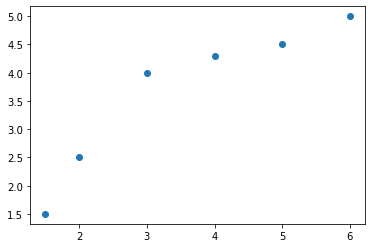

In [39]:
# create sample dataset and build linear regression model

#Create a sample dataset and build a linear regression model .
x=[[1.5], [2], [3],[4],[5],[6]]
y=[[1.5],[2.5],[4],[4.3],[4.5], [5]]

# create a scatter plot to view the shape of the data
plt.scatter(x,y)

In [40]:
# check score for this sample dataset
model2 = LinearRegression()

# fit the data
model2.fit(x,y)
print("R-squared score: ")
print(model2.score(x,y))

R-squared score: 
0.8542688166607694


In [41]:
# check to see if model will fit with second degree polynoial function
# must transform the x and make new x^2 col., then y to treat like linear regression
# x, x^2, y
# build the equation

# define how to transform
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree = 2)

# transform the x
x_new = polynomial_features.fit_transform(x)

print("X New: ")
x_new # gives three columns -> x^0, x, x^2

X New: 


array([[ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  6.  , 36.  ]])

In [42]:
# can use this data to build linear regression model
model3 = LinearRegression()
model3.fit(x_new, y)

# check correl. after we have transformed the x
print("R-Squared w/ Transformed X: ")
print(model3.score(x_new, y))

R-Squared w/ Transformed X: 
0.9636651934017191


In [43]:
print("Slope: ")
print(model3.intercept_)

print("Coef.: ")
print(model3.coef_)

# this equation will look this way: y = 2.2x + -0.2x^2 + -1.2

Slope: 
[-1.19785039]
Coef.: 
[[ 0.          2.22076526 -0.2033534 ]]


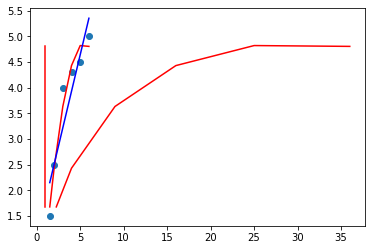

In [49]:
# examine scatterplot w/ the modeled x now and compare w/ model from previous data
# model2 = first degree model
# model3 = second degree model

plt.scatter(x, y)
plt.plot(x_new, model3.predict(x_new), color = 'r')
plt.plot(x, model2.predict(x), color = 'b')

plt.show()

# with this, we can compare which degree models best fit the testing or training data

### Bias-Variance Trade-Off
- *bias*: diff. btwn avg prediction of our model and correct value trying to predict
    - *high bias*: pays little attention to training data and oversimplifies model -> leads to high error on training and test data; does not perfectly connect the dots
    - *low bias*: perfectly connects the dots, may have higher degree poly. function
    
- *variance*: variability of model prediction for given data point or value which tells spread of data
    - *high variance*: pays lot of attention to training data, does not generalize on data it is predicting -> has high error rates on test data
    - amount of space between the dot and the line on the graph
- goal is to have low bias and low variance
- *overfitting*: trying to find line that fits all training data points perfectly
- *underfitting*: line that does not fit most points

- *total error*: TE of machine-learning model is sum of bias error and variance error